# Decision Trees

### Sources include Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*
### Kudos to Kevin Markham for preseideas 

## Why are we learning about decision trees?
 
### - Can be applied to both regression and classification problems
### - Very popular
### - Explainable to doctors, executives and even trial juries!
### - Basis for more sophisticated models like boosting and random forests
### - Have a different way of "thinking" than the other models we have studied

# Investigate Depth of Decision Trees
Lets start with an example

In [59]:
# Set up plotting for notebooks
%matplotlib inline

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from math import pi
import pandas as pd

In [48]:
# Create a random dataset from a 
rng = np.random.RandomState(1)
X = 2 * np.sort(rng.rand(80, 1), axis=0)
y = np.cos(pi * X).ravel()
y[::5] += (0.5 - rng.rand(16))

# Question time with a partner:
-What does the data look like before the last line?

-Why did I put the pi in the definition of y and what is the effect? 

# Now let's code a simple tree visualize it

In [49]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
# Predict
X_test = np.arange(0.0, 2.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

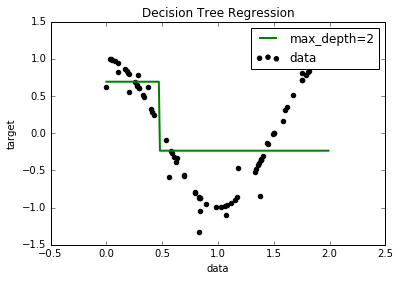

In [51]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Try it again with a depth of 2

In [52]:
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(X, y)
y_2 = regr_2.predict(X_test)

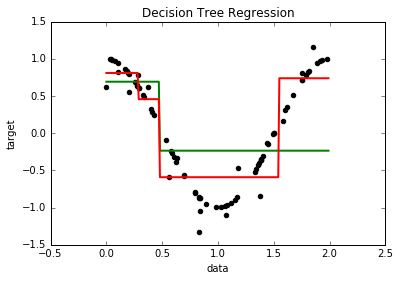

In [54]:
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
#plt.legend()
plt.show()

# Discussion time:

-How are the trees different? Which is a better model?

-Is this a good visualization of the tree? What works and what doesn't?

-What limits might there be on this style of representation?

## Building a classification tree in scikit-learn

We'll build a classification tree using the Titanic data:
Kudos to Kaggle and UCI

In [63]:
# create a GraphViz file
from sklearn.tree import export_graphviz
export_graphviz(regr_2, out_file='cos.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
# dot -Tpng cos.dot -o cos.png

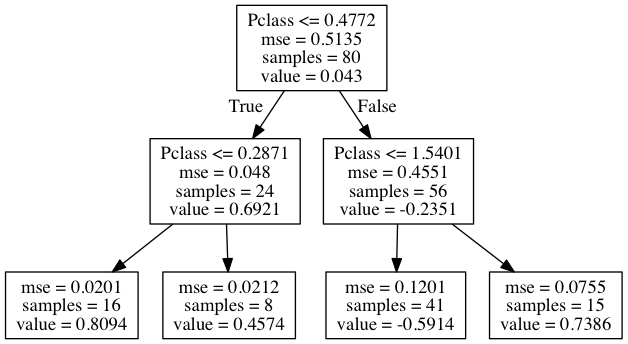

In [64]:
from IPython.display import Image
Image('cos.png')